<a href="https://colab.research.google.com/github/jmparejaz/Datalytics/blob/main/JOSEMARIOPAREJA_DataSchool_python_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Prueba python</h1>
</div>

Vamos a recrear el mismo ejercicio de la prueba de SQL desde el punto 1 al punto 1.7, pero usando lo aprendido en el notebook de Python Intro, podemos hacer los ejercicios usando la libreria Pandas

**RECUERDA CREAR UNA COPIA DE ESTE NOTEBOOK Y COMPARTIR EL LINK DE LA COPIA**

Puedes seguir los siguientes pasos: 
  1. Das click en Archivo 
  2. Das click en Guardar una copia en Drive con tu nombre
  3. Das click en compartir y agregas el link en el forms

1) En base a las siguientes tablas, responde las preguntas de esta sección. Nota: las tablas “cruzan” por la columna “continente”.

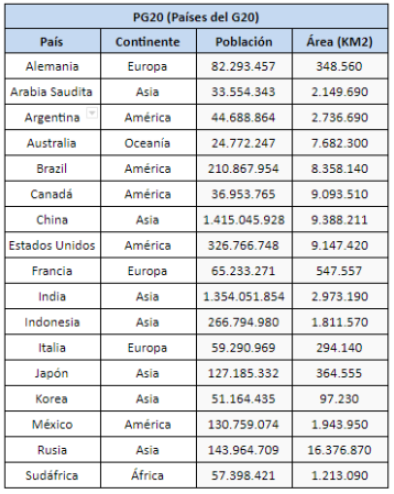




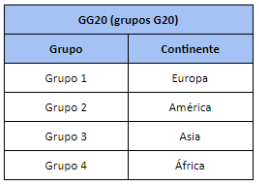


1.1) Escribe una consulta que devuelva el detalle de Argentina (columnas: país, población, área, continente).

In [130]:
import pandas as pd

In [119]:
url_tpg20='https://github.com/jmparejaz/Datalytics/blob/bae8c4370880411e81e5e2c522a5de704e474df7/datalitics.csv'
url_grupos='https://github.com/jmparejaz/Datalytics/blob/bae8c4370880411e81e5e2c522a5de704e474df7/datalitics2.csv'


In [120]:
df=pd.read_html(url_tpg20)[0].iloc[:,1:]
df.columns= ['Pais','Continente','Poblacion','Area']
df

,Pais,Continente,Poblacion,Area
0,Alemania,Europa,82293457,348560
1,Arabia Saudita,Asia,33554343,2149690
2,Argentina,América,44688864,2736690
3,Australia,Oceanía,24772247,7682300
4,Brazil,América,210867954,8358140
5,Canadá,América,36953765,9093510
6,China,Asia,1415045928,9388211
7,Estados Unidos,América,326766748,9147420
8,Francia,Europa,65233271,547557
9,India,Asia,1354051854,2973190


In [121]:
df[df['Pais'] =='Argentina']

,Pais,Continente,Poblacion,Area
2,Argentina,América,44688864,2736690


1.2) Modificando la consulta anterior, agrega la columna “grupo”

In [123]:
df2=pd.read_html(url_grupos)[0].iloc[:,1:]
df2.columns= ['Grupo','Continente']
df2

,Grupo,Continente
0,grupo 1,Europa
1,grupo 2,América
2,grupo 3,Asia
3,grupo 4,África


In [124]:
df3 = pd.merge(df,df2, on ='Continente',how ='left')
df3

,Pais,Continente,Poblacion,Area,Grupo
0,Alemania,Europa,82293457,348560,grupo 1
1,Arabia Saudita,Asia,33554343,2149690,grupo 3
2,Argentina,América,44688864,2736690,grupo 2
3,Australia,Oceanía,24772247,7682300,NaN
4,Brazil,América,210867954,8358140,grupo 2
5,Canadá,América,36953765,9093510,grupo 2
6,China,Asia,1415045928,9388211,grupo 3
7,Estados Unidos,América,326766748,9147420,grupo 2
8,Francia,Europa,65233271,547557,grupo 1
9,India,Asia,1354051854,2973190,grupo 3


In [125]:
df3[df3['Pais'] == 'Argentina']

,Pais,Continente,Poblacion,Area,Grupo
2,Argentina,América,44688864,2736690,grupo 2


1.3) Escribe una consulta que devuelva los países de latinoamérica (Argentina, Mexico y Brazil) y su detalle (columnas: población y área).

In [126]:
df[(df['Pais'] == 'Argentina')| (df['Pais'] == 'México') | (df['Pais'] == 'Brazil')][['Pais','Poblacion','Area']]

,Pais,Poblacion,Area
2,Argentina,44688864,2736690
4,Brazil,210867954,8358140
14,México,130759074,1943950


1.4) Escribe una consulta que calcule la densidad poblacional (población / área) y nombre la columna “densidad”

In [127]:
df3['Densidad'] = df3['Poblacion'] / df3['Area']

In [128]:
df3

,Pais,Continente,Poblacion,Area,Grupo,Densidad
0,Alemania,Europa,82293457,348560,grupo 1,236.095527
1,Arabia Saudita,Asia,33554343,2149690,grupo 3,15.608922
2,Argentina,América,44688864,2736690,grupo 2,16.329531
3,Australia,Oceanía,24772247,7682300,NaN,3.224587
4,Brazil,América,210867954,8358140,grupo 2,25.229053
5,Canadá,América,36953765,9093510,grupo 2,4.063752
6,China,Asia,1415045928,9388211,grupo 3,150.725833
7,Estados Unidos,América,326766748,9147420,grupo 2,35.722285
8,Francia,Europa,65233271,547557,grupo 1,119.135124
9,India,Asia,1354051854,2973190,grupo 3,455.420560


1.5) Escribe la consulta que calcule la población para cada continente ordenada por población descendente

In [129]:
df3.groupby('Continente')['Poblacion'].sum().sort_values(ascending=False)

Continente
Asia       3391761581
América     750036405
Europa      206817697
África       57398421
Oceanía      24772247
Name: Poblacion, dtype: int64

1.6) Escribe la consulta que calcule la población total de los países Latinoamerica (Argentina, Mexico y Brazil).

In [135]:
df3[(df3['Pais'] == 'Argentina')| (df3['Pais'] == 'México') | (df3['Pais'] == 'Brazil')]['Poblacion'].sum()

386315892

1.7) Escribe la consulta que devuelva el listado de todos los continentes con la cantidad de países donde esa cantidad sea mayor a 1

In [151]:
df4=df3.groupby(['Continente'])['Pais'].count()
df4[df4>1]

Continente
América    5
Asia       7
Europa     3
Name: Pais, dtype: int64